In [1]:
import numpy as np
import pandas as pd
from FS import feature_select, delete_zero_and_var
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.linear_model import LogisticRegression  #Logistic Regression
from sklearn.tree import DecisionTreeClassifier  #Decision Tree
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.neural_network import MLPClassifier  #Neural Network
from sklearn.svm import SVC  #SVM
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve
from sklearn.metrics import roc_auc_score as AUC

import matplotlib.pylab as plt
import numpy as np
import graphviz

In [2]:
# 读取cvs训练数据集
cvs_path = "./data/csv/Molecular_Descriptor_train.csv"
df = pd.read_csv(cvs_path, index_col=0)
cvs_path2 = "./data/csv/ADMET_train.csv"
df_admet = pd.read_csv(cvs_path2, index_col=0)

cvs_test_path = "./data/csv/Molecular_Descriptor_test_Q3.csv"
df_Q3_test = pd.read_csv(cvs_test_path, index_col=0)
print(df_Q3_test.shape)

(50, 730)


In [3]:
df_admet

,SMILES,Caco-2,CYP3A4,hERG,HOB,MN
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,1,1,0,0
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,1,1,0,0
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,1,1,0,1
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,1,1,0,0
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1,1,0,0
...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,0,1,1,0,1
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,0,1,1,0,1
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,0,1,0,0,1
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,0,1,0,0,1


In [15]:
# 数据分割

X = df.drop(['SMILES', 'pIC50'], axis=1)
X_t = df_Q3_test.drop(['SMILES'], axis=1)

y1 = df_admet["Caco-2"]
y2 = df_admet["CYP3A4"]
y3 = df_admet["hERG"]
y4 = df_admet["HOB"]
y5 = df_admet["MN"]
print(X.shape, y1.shape)
print(X_t.shape)

(1974, 729) (1974,)
(50, 729)


In [54]:
# 特征选择
no_zero_X = delete_zero_and_var(X, 0.00)  #输入
# 提取后的总训练集和选择的列Name
# X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y2, test_size=0.2, random_state=0, shuffle=False)
no_zero_X_test = df_Q3_test[list(no_zero_X)]

print(list(no_zero_X), no_zero_X.shape)
print(no_zero_X_test.shape)

最终剩余特征数 503
sum=0特征:  225 方差过小特征:  0
['nB', 'nBondsQ', 'nHsNH3p', 'nHssNH2p', 'nHsssNHp', 'nHmisc', 'nsLi', 'nssBe', 'nssssBem', 'nsBH2', 'nssBH', 'nsssB', 'nssssBm', 'nddC', 'nsNH3p', 'nssNH2p', 'nsssNHp', 'nddsN', 'naOm', 'nsSiH3', 'nssSiH2', 'nsssSiH', 'nssssSi', 'nsPH2', 'nssPH', 'nsssP', 'nddsP', 'nsssssP', 'nssssssS', 'nSm', 'nsGeH3', 'nssGeH2', 'nsssGeH', 'nssssGe', 'nsAsH2', 'nssAsH', 'nsssAs', 'ndsssAs', 'nddsAs', 'nsssssAs', 'nsSeH', 'ndSe', 'nssSe', 'naaSe', 'ndssSe', 'nssssssSe', 'nddssSe', 'nsSnH3', 'nssSnH2', 'nsssSnH', 'nssssSn', 'nsPbH3', 'nssPbH2', 'nsssPbH', 'nssssPb', 'SHsNH3p', 'SHssNH2p', 'SHsssNHp', 'SHmisc', 'SsLi', 'SssBe', 'SssssBem', 'SsBH2', 'SssBH', 'SsssB', 'SssssBm', 'SddC', 'SsNH3p', 'SssNH2p', 'SsssNHp', 'SddsN', 'SaOm', 'SsSiH3', 'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH', 'SsssP', 'SddsP', 'SsssssP', 'SssssssS', 'SSm', 'SsGeH3', 'SssGeH2', 'SsssGeH', 'SssssGe', 'SsAsH2', 'SssAsH', 'SsssAs', 'SdsssAs', 'SddsAs', 'SsssssAs', 'SsSeH', 'SdSe', 'SssS

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y3, test_size=0.2, random_state=0, shuffle=False)
#标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.fit_transform(X_test)

cls = SVC(kernel='linear', C=0.5)
cls.fit(X_train_s, y_train)

y_pred = cls.predict(X_test_s)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.47      0.95      0.63        80
           1       0.98      0.72      0.83       315

    accuracy                           0.77       395
   macro avg       0.72      0.84      0.73       395
weighted avg       0.88      0.77      0.79       395



建立的SVM模型为： SVC(C=100, gamma=0.001)
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       143
           1       0.98      0.97      0.97       450

    accuracy                           0.96       593
   macro avg       0.94      0.95      0.94       593
weighted avg       0.96      0.96      0.96       593

预测对的结果数目为： 569
预测错的结果数目为： 24
准确率为： 0.9595278246205734
精确率为： 0.9754464285714286
召回率为： 0.9711111111111111
F1值为： 0.9732739420935412
Cohen’s Kappa系数为： 0.8899423109640101


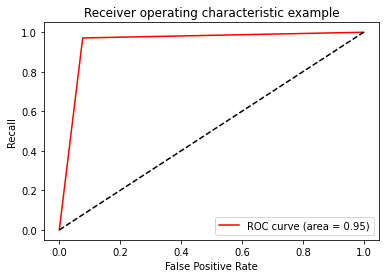

1


In [55]:
X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y5, test_size=0.3, random_state=0, shuffle=True)
#标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.fit_transform(X_test)

# X_train_s = X_train
# X_test_s = X_test


#建立SVM模型
svm = SVC(kernel="rbf", C=100, gamma=0.001).fit(X_train_s, y_train)
print("建立的SVM模型为：", svm)

y_pred = svm.predict(X_test_s)
print(classification_report(y_test, y_pred))
true = np.sum(y_pred == y_test)
print('预测对的结果数目为：', true)
print('预测错的结果数目为：', y_pred.shape[0] - true)

#参数
print('准确率为：',
      accuracy_score(y_test, y_pred))
print('精确率为：',
      precision_score(y_test, y_pred))
print('召回率为：',
      recall_score(y_test, y_pred))
print('F1值为：',
      f1_score(y_test, y_pred))
print('Cohen’s Kappa系数为：',
      cohen_kappa_score(y_test, y_pred))

# ## 求出ROC曲线的x轴和y轴
FPR, recall, thresholds = roc_curve(y_test, y_pred)
area = AUC(y_test, y_pred)

# 画出ROC曲线
plt.figure()
plt.plot(FPR, recall, color='red'
         , label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# 为了让曲线不黏在图的边缘
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 利用ROC曲线找出最佳阀值
maxindex = (recall - FPR).tolist().index(max(recall - FPR))
print(thresholds[maxindex])  # -1.0860191749391461


In [57]:
# y1 = df_admet["Caco-2"]
# y2 = df_admet["CYP3A4"]
# y3 = df_admet["hERG"]
# y4 = df_admet["HOB"]
# y5 = df_admet["MN"]
index = "MN"
Q3_i = scale.fit_transform(no_zero_X_test)
Q3_pred = svm.predict(Q3_i)
pd.DataFrame(Q3_pred,columns=[index])
pd.DataFrame(Q3_pred,columns=[index]).to_excel("./"+index+".xlsx")


In [10]:
pd.DataFrame(y_pred)


,0
0,1
1,0
2,0
3,0
4,1
...,...
588,1
589,0
590,0
591,0


In [11]:
best_score = 0
for gamma in [0.001, 0.01, 1, 10]:
    for c in [0.1, 0.5, 1, 10, 100]:
        # 对于每种参数可能的组合，进行一次训练
        svm = SVC(gamma=gamma, C=c)
        # 5 折交叉验证
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        score = scores.mean()
        # 找到表现最好的参数
        if score > best_score:
            best_score = score
        best_parameters = {'gamma': gamma, "C": c}

# 使用最佳参数，构建新的模型
svm = SVC(**best_parameters)

# 使用训练集和验证集进行训练 more data always resultd in good performance
svm.fit(X_train, y_train)

# evalyation 模型评估
test_score = svm.score(X_test, y_test)

print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))
print('Best score on test set:{:.2f}'.format(test_score))

0.6198398995448124
0.6212865588866217
0.6422853555171872
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
0.6575027468215351
Best socre:0.66
Best parameters:{'gamma': 10, 'C': 100}
Best score on test set:0.63


In [8]:
# accuracy
print('Test score: %.4f' % cls.score(X_test, y_test))
print('Train score: %.4f' % cls.score(X_train, y_train))
w = cls.coef_  # 方向向量W
b = cls.intercept_

Test score: 0.8025
Train score: 0.5687


In [ ]:
# 网格搜索模块
X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y5, test_size=0.3, random_state=0, shuffle=True)
#标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.fit_transform(X_test)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
                    # 'C': range(10,1000,100)},
                    # {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
                    ]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
# 用训练集训练这个学习器 clf
clf.fit(X_train_s, y_train)

print("Best parameters set found on development set:")
print()

# 再调用 clf.best_params_ 就能直接得到最好的参数搭配结果
print(clf.best_params_)

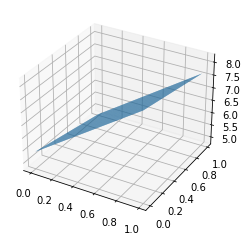

In [9]:
# plot
# 绘制分类平面
ax = plt.subplot(111, projection='3d')
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.11)
x, y = np.meshgrid(x, y)
z = (w[0, 0] * x + w[0, 1] * y + b) / (-w[0, 2])
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1)

ValueError: x and y must have same first dimension, but have shapes (14,) and (1,)

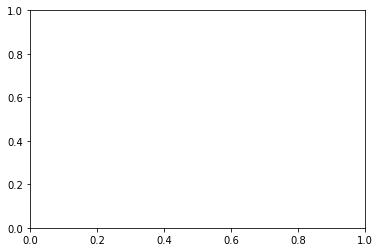

In [43]:
#----------KNN Classifier
X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y1, test_size=0.2, random_state=0, shuffle=False)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1, 15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
training_accuracy.append(knn.score(X_train, y_train))
test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()



ValueError: cannot reshape array of size 1579 into shape (798,1569)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython_darwin_38_64.pyx", line 1034, in _pydevd_bundle.pydevd_cython_darwin_38_64.PyDBFrame.trace_dispatch
  File "/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 144, in cmd_step_over
    if _is_inside_jupyter_cell(frame, pydb):
  File "/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 209, in _is_inside_jupyter_cell
    if is_cell_filename(filename):
  File "/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 220, in is_cell_filename
    ipython_shell = get_ipython()
NameError: name 'get_ipython' is not defined


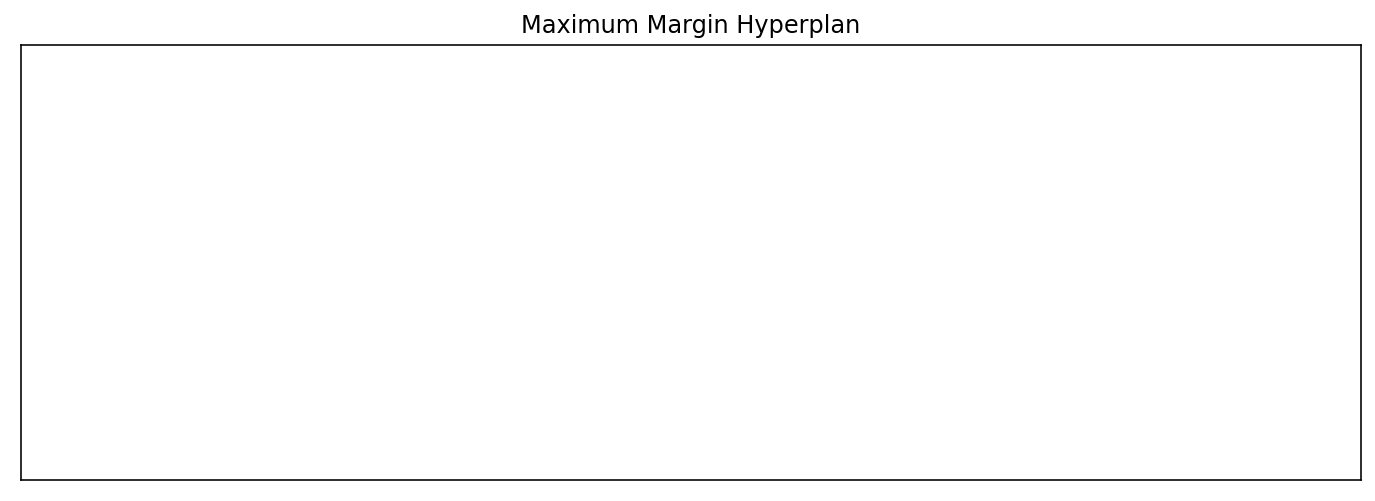

In [21]:
## PCA降低到二维画图？
def plot_hyperplane(clf, X_s, y_s,
                    h=0.02,
                    draw_sv=True,
                    title='hyperplan'):
    X = X_s[:, 0:2]
    y = y_s
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(X_s)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y == label][:, 0],
                    X[y == label][:, 1],
                    c=colors[label],
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')


X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y1, test_size=0.2, random_state=0, shuffle=False)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

clf = SVC(C=1.0, kernel='linear')
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 4), dpi=144)
plot_hyperplane(clf, X_train, y_train, h=0.01,
                title='Maximum Margin Hyperplan')